## Predictive Analytics : Prediksi Harga Properti Rumah di Kota Bandung

## Data Loading


### Import Library

In [1]:
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

### Mengunduh Dataset

In [2]:
# Download dataset
!kaggle datasets download -d khaleeel347/harga-rumah-seluruh-kecamatan-di-kota-bandung

Dataset URL: https://www.kaggle.com/datasets/khaleeel347/harga-rumah-seluruh-kecamatan-di-kota-bandung
License(s): Attribution 4.0 International (CC BY 4.0)
harga-rumah-seluruh-kecamatan-di-kota-bandung.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# Melakukan ekstraksi pada file zip
local_zip = 'harga-rumah-seluruh-kecamatan-di-kota-bandung.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/harga-rumah-seluruh-kecamatan-di-kota-bandung/')
zip_ref.close()

In [4]:
# Cek isi direktori dataset
os.listdir('/content/harga-rumah-seluruh-kecamatan-di-kota-bandung/')

['results.csv', 'results_cleaned.csv']

Dari keluaran di atas, dapat diketahui bahwa ada dua berkas data, diantaranya adalah dataset utama (raw) dan berkas lainnya adalah merupakan dataset yang sudah bersih. Pada proyek ini akan menggunakan dataset utama (raw)

Mari kita lihat data dokumentasinya dengan menggunakan `pandas`.

In [5]:
# Cek dokumentasi dataset
house = pd.read_csv('/content/harga-rumah-seluruh-kecamatan-di-kota-bandung/results.csv', names=["type", "status", "price", "installment", "house_name", "location", "bedroom_count", "bathroom_count", "carport_count", "land_area", "building_area"])
house

,type,status,price,installment,house_name,location,bedroom_count,bathroom_count,carport_count,land_area,building_area
0,Rumah,Premier,"Rp 2,1 Miliar",Cicilan: 7 Jutaan per bulan,Rumah 2 Lantai Bagus Sertifikat Hak Milik di M...,"Andir, Bandung",3,2,2,137 m²,170 m²
1,Rumah,NaN,"Rp 4,1 Miliar",Cicilan: 15 Jutaan per bulan,Rumah Cantik @ Andir (Sudirman),"Andir, Bandung",3,2,3,202 m²,300 m²
2,Rumah,NaN,"Rp 3,3 Miliar",Cicilan: 12 Jutaan per bulan,Jual Cepat Rumah di Maleber Rajawali Bisa Untu...,"Andir, Bandung",5,2,1,350 m²,258 m²
3,Rumah,NaN,Rp 580 Juta,Cicilan: 2 Jutaan per bulan,Rumah minimalis 3 lantai di andir Bandung coco...,"Andir, Bandung",2,2,1,30 m²,80 m²
4,Rumah,NaN,"Rp 1,3 Miliar",Cicilan: 4 Jutaan per bulan,Jual Rumah Murah Bisa Dijadikan Kos”an Di Jala...,"Andir, Bandung",11,3,0,176 m²,176 m²
...,...,...,...,...,...,...,...,...,...,...,...
7606,Rumah,NaN,Rp 11 Miliar,Cicilan: 40 Jutaan per bulan,"Rumah Lux Terawat di Taman Sakura Raya , Bandung","Babakanciparay, Bandung",4,5,0,600 m²,500 m²
7607,Rumah,NaN,"Rp 3,2 Miliar",Cicilan: 11 Jutaan per bulan,Rumah 3 Lantai Bagus Terawat di Sumber Sari,"Babakanciparay, Bandung",4,5,2,200 m²,600 m²
7608,Rumah,NaN,"Rp 5,5 Miliar",Cicilan: 20 Jutaan per bulan,Rumah Besar Elegant Asri Nyaman Sumbersari Ban...,"Babakanciparay, Bandung",6,3,3,375 m²,290 m²
7609,Rumah,NaN,"Rp 4,89 Miliar",Cicilan: 18 Jutaan per bulan,Rumah strategis nyaman belakang mall sumber sa...,"Babakanciparay, Bandung",5,3,3,375 m²,290 m²


- Terdapat 7.611 baris dalam dataset.
- Terdapat 11 kolom yaitu: `type`, `status`, `price`, `installment`, `house_name`, `location`, `bedroom_count`, `bathroom_count`, `carport_count`, `land_area`, dan `building_area`.



## Exploratory Data Analysis (EDA)

Variabel-variabel pada Dataset Daftar Harga Rumah di Kota Bandung adalah sebagai berikut:

- `type`: Jenis atau kategori properti.
- `status`: Status properti (misalnya, tersedia, terjual).
- `price`: Harga properti dalam Rupiah (IDR).
- `installment`: Rincian rencana cicilan yang terkait dengan properti.
- `house_name`: Nama atau judul properti residensial.
- `location`: Lokasi atau area di Bandung di mana properti tersebut berada.
- `bedroom_count`: Jumlah kamar tidur di properti.
- `bathroom_count`: Jumlah kamar mandi di properti.
- `carport_count`: Jumlah carport atau tempat parkir yang tersedia di properti.
- `land_area`: Total luas tanah properti dalam meter persegi.
- `building_area`: Total luas bangunan properti dalam meter persegi.

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7611 entries, 0 to 7610
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   type            7611 non-null   object
 1   status          145 non-null    object
 2   price           7611 non-null   object
 3   installment     7611 non-null   object
 4   house_name      7611 non-null   object
 5   location        7611 non-null   object
 6   bedroom_count   7611 non-null   int64 
 7   bathroom_count  7611 non-null   int64 
 8   carport_count   7611 non-null   int64 
 9   land_area       7609 non-null   object
 10  building_area   7610 non-null   object
dtypes: int64(3), object(8)
memory usage: 654.2+ KB


Dari output terlihat bahwa:

- Jumlah data terdiri dari 7.611 baris dan 11 kolom.

- Terdapat missing value di beberapa kolom, diantaranya pada `status`, `land_area`, dan `building_area`.

- Kolom `price`, `installment`, `land_area`, dan `building_area` bertipe objek, padahal kita akan memprediksi harga yang merupakan kategori numerik. Hal ini harus diubah menjadi numerik dengan tipe data int64.

In [7]:
house.isnull().sum()

,0
type,0
status,7466
price,0
installment,0
house_name,0
location,0
bedroom_count,0
bathroom_count,0
carport_count,0
land_area,2


- Terdapat 7466 missing value pada kolom `status`
- Terdapat 2 missing value pada kolom `land_area`
- Terdapat 1 missing value pada kolom `building_area`

In [8]:
print("Jumlah duplikasi: ", house.duplicated().sum())

Jumlah duplikasi:  616


In [9]:
house.describe()

,bedroom_count,bathroom_count,carport_count
count,7611.000000,7611.000000,7611.000000
mean,4.477467,3.196295,1.374721
std,4.712062,4.104303,1.927984
min,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000
50%,4.000000,3.000000,1.000000
75%,5.000000,3.000000,2.000000
max,99.000000,99.000000,40.000000


Dari hasil fungsi describe(), nilai minimum untuk kolom `bedroom_count`, `bathroom_count`, dan `carport_count` adalah 0. `bedroom_count`, `bathroom_count`, dan `carport_count` adalah jumlah dari kamar tidur, kamar mandi, dan tempat parkir di suatu properti, sehingga tidak mungkin ada properti dengan jumlah kamar tidur, kamar mandi, dan tempat parkir bernilai 0. Cek ada berapa missing value pada ketiga kolom tersebut.

In [10]:
bedroom = (house.bedroom_count == 0).sum()
bathroom = (house.bathroom_count == 0).sum()
carport = (house.carport_count == 0).sum()

print("Nilai 0 di kolom bedroom_count ada: ", bedroom)
print("Nilai 0 di kolom bathroom_count ada: ", bathroom)
print("Nilai 0 di kolom carport_count ada: ", carport)

Nilai 0 di kolom bedroom_count ada:  198
Nilai 0 di kolom bathroom_count ada:  169
Nilai 0 di kolom carport_count ada:  2300


# Data Preparation

### Menangani Missing Value

In [11]:
house[house.status.isna()]

,type,status,price,installment,house_name,location,bedroom_count,bathroom_count,carport_count,land_area,building_area
1,Rumah,NaN,"Rp 4,1 Miliar",Cicilan: 15 Jutaan per bulan,Rumah Cantik @ Andir (Sudirman),"Andir, Bandung",3,2,3,202 m²,300 m²
2,Rumah,NaN,"Rp 3,3 Miliar",Cicilan: 12 Jutaan per bulan,Jual Cepat Rumah di Maleber Rajawali Bisa Untu...,"Andir, Bandung",5,2,1,350 m²,258 m²
3,Rumah,NaN,Rp 580 Juta,Cicilan: 2 Jutaan per bulan,Rumah minimalis 3 lantai di andir Bandung coco...,"Andir, Bandung",2,2,1,30 m²,80 m²
4,Rumah,NaN,"Rp 1,3 Miliar",Cicilan: 4 Jutaan per bulan,Jual Rumah Murah Bisa Dijadikan Kos”an Di Jala...,"Andir, Bandung",11,3,0,176 m²,176 m²
5,Rumah,NaN,"Rp 3,6 Miliar",Cicilan: 13 Jutaan per bulan,"Rumah 2,5 Lantai Strategis SHM di Komplek Kert...","Andir, Bandung",5,3,1,184 m²,234 m²
...,...,...,...,...,...,...,...,...,...,...,...
7606,Rumah,NaN,Rp 11 Miliar,Cicilan: 40 Jutaan per bulan,"Rumah Lux Terawat di Taman Sakura Raya , Bandung","Babakanciparay, Bandung",4,5,0,600 m²,500 m²
7607,Rumah,NaN,"Rp 3,2 Miliar",Cicilan: 11 Jutaan per bulan,Rumah 3 Lantai Bagus Terawat di Sumber Sari,"Babakanciparay, Bandung",4,5,2,200 m²,600 m²
7608,Rumah,NaN,"Rp 5,5 Miliar",Cicilan: 20 Jutaan per bulan,Rumah Besar Elegant Asri Nyaman Sumbersari Ban...,"Babakanciparay, Bandung",6,3,3,375 m²,290 m²
7609,Rumah,NaN,"Rp 4,89 Miliar",Cicilan: 18 Jutaan per bulan,Rumah strategis nyaman belakang mall sumber sa...,"Babakanciparay, Bandung",5,3,3,375 m²,290 m²


Dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kolom `status`, akan menggunakan metode imputation untuk menangani missing value.

In [12]:
house.status.value_counts()

,count
status,
Featured,85
Premier,60


Berdasarkan hasil di atas, dapat diketahui bahwa nilai yang paling dominan dalam kolom `status` ialah "Featured". Nilai inilah yang selanjutnya akan digunakan sebagai pengganti missing value.

In [13]:
# Mengisi nilai kosong pada kolom `status` dengan nilai yang paling dominan yaitu "Featured"
house['status'].fillna(value="Featured", inplace=True)

<ipython-input-13-2f05c5e3dcf5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['status'].fillna(value="Featured", inplace=True)


In [14]:
print("Jumlah missing value: ", house.status.isna().sum())

Jumlah missing value:  0


In [15]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7611 entries, 0 to 7610
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   type            7611 non-null   object
 1   status          7611 non-null   object
 2   price           7611 non-null   object
 3   installment     7611 non-null   object
 4   house_name      7611 non-null   object
 5   location        7611 non-null   object
 6   bedroom_count   7611 non-null   int64 
 7   bathroom_count  7611 non-null   int64 
 8   carport_count   7611 non-null   int64 
 9   land_area       7609 non-null   object
 10  building_area   7610 non-null   object
dtypes: int64(3), object(8)
memory usage: 654.2+ KB


In [16]:
house[house.land_area.isna()]

,type,status,price,installment,house_name,location,bedroom_count,bathroom_count,carport_count,land_area,building_area
194,Rumah,Featured,"Rp 1,65 Miliar",Cicilan: 6 Jutaan per bulan,Home industry di Cibeureum,"Andir, Bandung",8,3,0,NaN,NaN
4034,Rumah,Featured,"Rp 3,7 Miliar",Cicilan: 13 Jutaan per bulan,rumah tua sayap pajajaran for sale,"Cicendo, Bandung",5,2,3,NaN,308 m²


2 sampel missing value pada kolom `land_area` merupakan jumlah yang kecil jika dibandingkan dengan jumlah total sampel yaitu 7.611. Jika 2 sampel ini dihapus, tidak jadi masalah sebab kita masih memiliki 7.611 sampel lainnya. Oleh karena itu, bisa dihapus saja missing value ini.

In [17]:
house[house.building_area.isna()]

,type,status,price,installment,house_name,location,bedroom_count,bathroom_count,carport_count,land_area,building_area
194,Rumah,Featured,"Rp 1,65 Miliar",Cicilan: 6 Jutaan per bulan,Home industry di Cibeureum,"Andir, Bandung",8,3,0,NaN,NaN


1 sampel missing value pada kolom `building_area` merupakan jumlah yang kecil jika dibandingkan dengan jumlah total sampel yaitu 7.611. Jika 1 sampel ini dihapus, tidak jadi masalah sebab kita masih memiliki 7.611 sampel lainnya. Oleh karena itu, bisa dihapus saja missing value ini.

In [18]:
# Hapus baris yang terdapat missing value
house = house.dropna()

In [19]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7609 entries, 0 to 7610
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   type            7609 non-null   object
 1   status          7609 non-null   object
 2   price           7609 non-null   object
 3   installment     7609 non-null   object
 4   house_name      7609 non-null   object
 5   location        7609 non-null   object
 6   bedroom_count   7609 non-null   int64 
 7   bathroom_count  7609 non-null   int64 
 8   carport_count   7609 non-null   int64 
 9   land_area       7609 non-null   object
 10  building_area   7609 non-null   object
dtypes: int64(3), object(8)
memory usage: 713.3+ KB


In [20]:
# Drop baris dengan nilai `bedroom_count`, `bathroom_count`, dan `carport_count` = 0
house = house.loc[(house[['bedroom_count', 'bathroom_count', 'carport_count']]!=0).all(axis=1)]

In [21]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5233 entries, 0 to 7609
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   type            5233 non-null   object
 1   status          5233 non-null   object
 2   price           5233 non-null   object
 3   installment     5233 non-null   object
 4   house_name      5233 non-null   object
 5   location        5233 non-null   object
 6   bedroom_count   5233 non-null   int64 
 7   bathroom_count  5233 non-null   int64 
 8   carport_count   5233 non-null   int64 
 9   land_area       5233 non-null   object
 10  building_area   5233 non-null   object
dtypes: int64(3), object(8)
memory usage: 490.6+ KB


### Menangani Duplikasi Data

In [22]:
house.drop_duplicates(inplace=True)

In [23]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4867 entries, 0 to 7609
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   type            4867 non-null   object
 1   status          4867 non-null   object
 2   price           4867 non-null   object
 3   installment     4867 non-null   object
 4   house_name      4867 non-null   object
 5   location        4867 non-null   object
 6   bedroom_count   4867 non-null   int64 
 7   bathroom_count  4867 non-null   int64 
 8   carport_count   4867 non-null   int64 
 9   land_area       4867 non-null   object
 10  building_area   4867 non-null   object
dtypes: int64(3), object(8)
memory usage: 456.3+ KB


### Menangani Masalah Tipe Data

In [24]:
# Fungsi untuk membersihkan dan mengkonversi nilai price
def clean_price(house):
    house = str(house)
    house = house.replace("Rp ", "").replace(".", "").replace(",", ".").strip()
    if "Miliar" in house:
        house = house.replace("Miliar", "")
        return int(float(house) * 1_000_000_000)
    elif "Juta" in house:
        house = house.replace("Juta", "")
        return int(float(house) * 1_000_000)
    else:
        try:
            return int(house)  # Jika tidak ada satuan, asumsikan sudah dalam Rupiah
        except ValueError:
            # Jika price tidak bisa dikonversi ke int, kembalikan nilai menjadi Nan
            return float('Nan')

# Terapkan fungsi ke kolom price
house['price'] = house['price'].apply(clean_price).astype('int64')

In [25]:
# Fungsi untuk membersihkan dan mengonversi kolom installment
def convert_installment(house):
    house = str(house)
    house = house.replace("Cicilan: ", "").strip()
    if "Jutaan" in house:
        house = house.replace("Jutaan per bulan", "")
        return int(float(house) * 1_000_000)
    elif "Ribuan" in house:
        house = house.replace("Ribuan per bulan", "")
        return int(float(house) * 1_000)
    else:
        return 0

# Terapkan fungsi pada kolom installment
house['installment'] = house['installment'].apply(convert_installment).astype('int64')

In [26]:
# Fungsi untuk membersihkan dan mengkonversi nilai area
def clean_area(house):
    house = str(house)
    return int(house.replace("m²", "").strip())

# Terapkan fungsi ke kolom land_area dan building_area
house['land_area'] = house['land_area'].apply(clean_area).astype('int64')
house['building_area'] = house['building_area'].apply(clean_area).astype('int64')

In [27]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4867 entries, 0 to 7609
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   type            4867 non-null   object
 1   status          4867 non-null   object
 2   price           4867 non-null   int64 
 3   installment     4867 non-null   int64 
 4   house_name      4867 non-null   object
 5   location        4867 non-null   object
 6   bedroom_count   4867 non-null   int64 
 7   bathroom_count  4867 non-null   int64 
 8   carport_count   4867 non-null   int64 
 9   land_area       4867 non-null   int64 
 10  building_area   4867 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 456.3+ KB


In [28]:
house

,type,status,price,installment,house_name,location,bedroom_count,bathroom_count,carport_count,land_area,building_area
0,Rumah,Premier,2100000000,7000000,Rumah 2 Lantai Bagus Sertifikat Hak Milik di M...,"Andir, Bandung",3,2,2,137,170
1,Rumah,Featured,4099999999,15000000,Rumah Cantik @ Andir (Sudirman),"Andir, Bandung",3,2,3,202,300
2,Rumah,Featured,3300000000,12000000,Jual Cepat Rumah di Maleber Rajawali Bisa Untu...,"Andir, Bandung",5,2,1,350,258
3,Rumah,Featured,580000000,2000000,Rumah minimalis 3 lantai di andir Bandung coco...,"Andir, Bandung",2,2,1,30,80
5,Rumah,Featured,3600000000,13000000,"Rumah 2,5 Lantai Strategis SHM di Komplek Kert...","Andir, Bandung",5,3,1,184,234
...,...,...,...,...,...,...,...,...,...,...,...
7603,Rumah,Featured,1800000000,6000000,Rumah Tua Hitung Tanah Saja Si Sumbersari Bandung,"Babakanciparay, Bandung",3,1,1,180,120
7604,Rumah,Featured,800000000,2000000,Rumah Strategis Banget di Babakan Ciparay,"Babakanciparay, Bandung",3,2,1,128,111
7607,Rumah,Featured,3200000000,11000000,Rumah 3 Lantai Bagus Terawat di Sumber Sari,"Babakanciparay, Bandung",4,5,2,200,600
7608,Rumah,Featured,5500000000,20000000,Rumah Besar Elegant Asri Nyaman Sumbersari Ban...,"Babakanciparay, Bandung",6,3,3,375,290


### Menangani Outliers

<Axes: xlabel='price'>

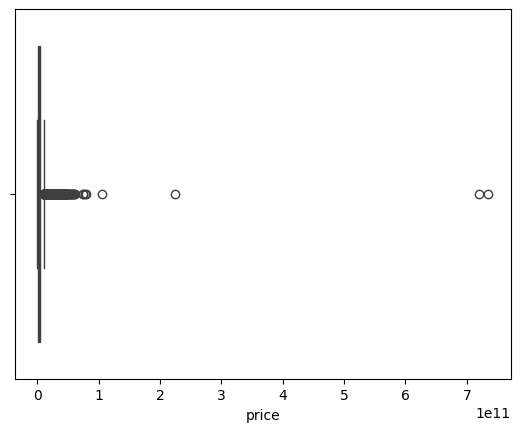

In [29]:
sns.boxplot(x=house['price'])

<Axes: xlabel='installment'>

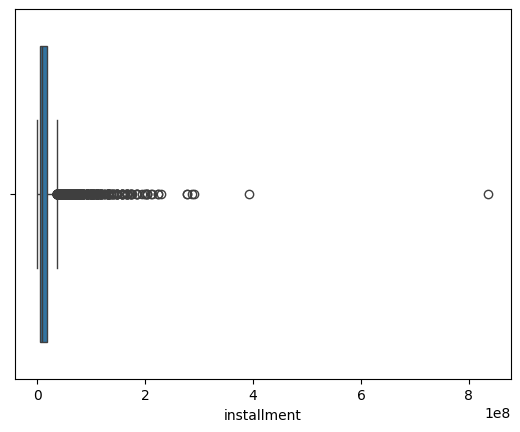

In [30]:
sns.boxplot(x=house['installment'])

<Axes: xlabel='bedroom_count'>

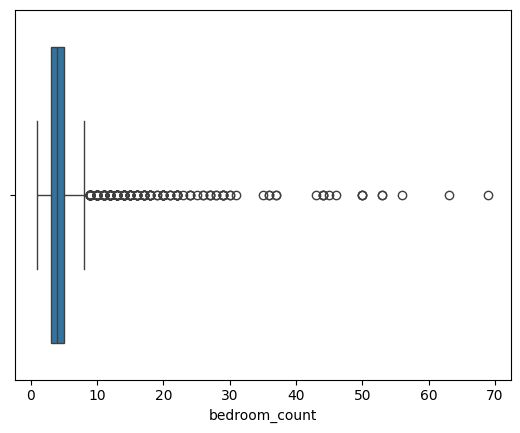

In [31]:
sns.boxplot(x=house['bedroom_count'])

<Axes: xlabel='bathroom_count'>

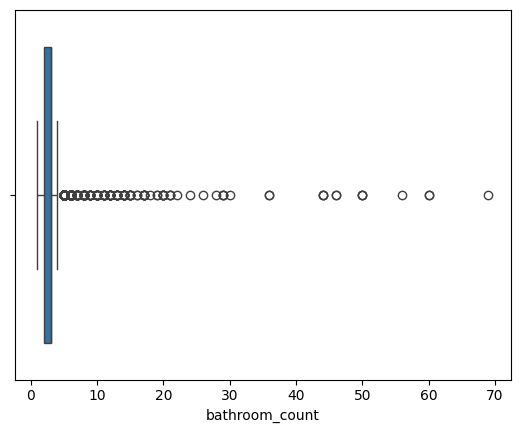

In [32]:
sns.boxplot(x=house['bathroom_count'])

<Axes: xlabel='carport_count'>

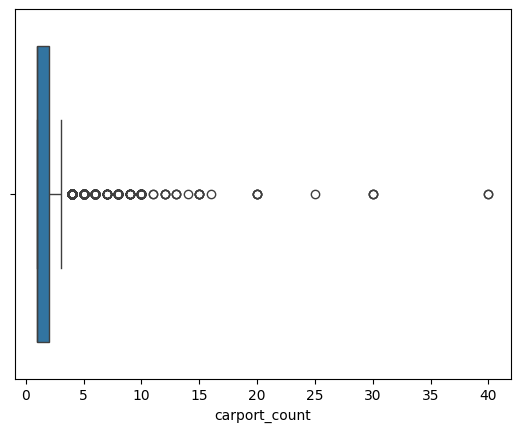

In [33]:
sns.boxplot(x=house['carport_count'])

<Axes: xlabel='land_area'>

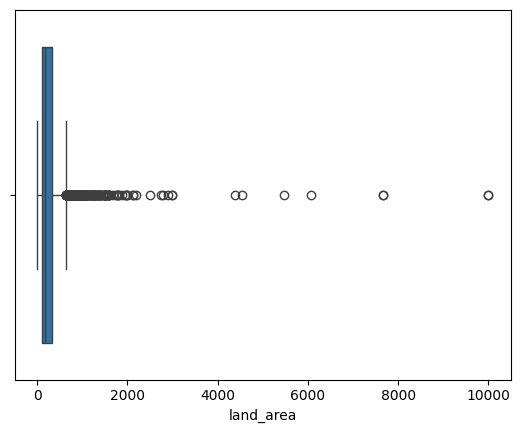

In [34]:
sns.boxplot(x=house['land_area'])

<Axes: xlabel='building_area'>

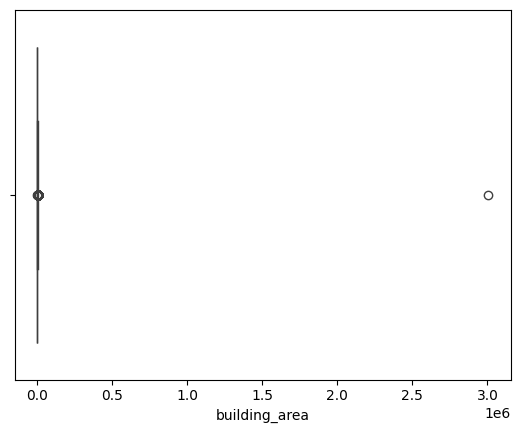

In [35]:
sns.boxplot(x=house['building_area'])

In [36]:
numeric_col = ['price', 'installment', 'bedroom_count', 'bathroom_count', 'carport_count', 'land_area', 'building_area']
house_numeric = house[numeric_col]
#kita cek apakah kolom numerik terpanggil
house[numeric_col]

,price,installment,bedroom_count,bathroom_count,carport_count,land_area,building_area
0,2100000000,7000000,3,2,2,137,170
1,4099999999,15000000,3,2,3,202,300
2,3300000000,12000000,5,2,1,350,258
3,580000000,2000000,2,2,1,30,80
5,3600000000,13000000,5,3,1,184,234
...,...,...,...,...,...,...,...
7603,1800000000,6000000,3,1,1,180,120
7604,800000000,2000000,3,2,1,128,111
7607,3200000000,11000000,4,5,2,200,600
7608,5500000000,20000000,6,3,3,375,290


In [37]:
# Mengatasi outliers tersebut dengan metode IQR
Q1 = house_numeric.quantile(0.25)
Q3 = house_numeric.quantile(0.75)
IQR = Q3 - Q1
house = house[~((house_numeric < (Q1 - 1.5 * IQR)) | (house_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

In [38]:
house.shape

(3751, 11)

Dataset sekarang telah bersih dan memiliki 3.751 sampel dari 8 fitur.

### Univariate Analysis

In [39]:
numerical_features = ['price', 'installment', 'bedroom_count', 'bathroom_count', 'carport_count', 'land_area', 'building_area']
categorical_features = ['type', 'status', 'house_name', 'location']

       jumlah sampel  persentase
type                            
Rumah           3751       100.0


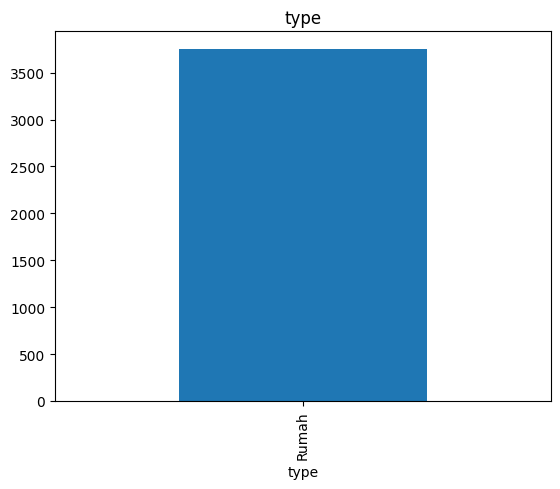

In [40]:
feature = categorical_features[0]
count = house[feature].value_counts()
percent = 100*house[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Terdapat 1 kategori pada fitur `type`, yaitu Rumah. Dari data persentase dapat disimpulkan bahwa 100% merupakan tipe Rumah.

          jumlah sampel  persentase
status                             
Featured           3708        98.9
Premier              43         1.1


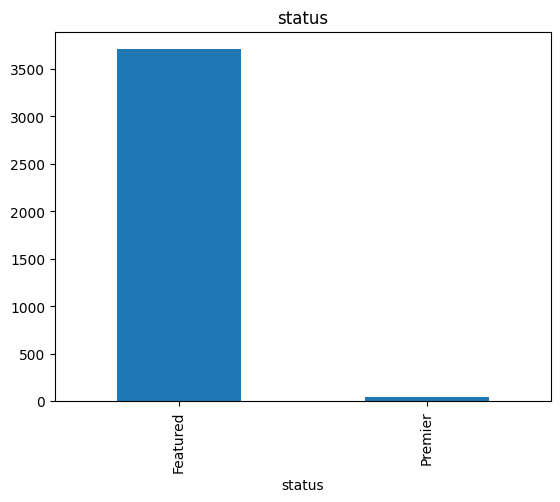

In [41]:
feature = categorical_features[1]
count = house[feature].value_counts()
percent = 100*house[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Terdapat 2 kategori pada fitur `status`, yaitu Featured dan Premiere. Dari data persentase dapat disimpulkan bahwa 98.9% merupakan tipe Featured dan 1.1% merupakan tipe Premiere.

In [42]:
feature = categorical_features[2]
count = house[feature].value_counts()
percent = 100*house[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

                                                    jumlah sampel  persentase
house_name                                                                   
Rumah 1 lantai dekat perkantoran dan jalanan ramai              6         0.2
DEKAT WISATA ALAM Hunian Islami Nuansa Sejuk De...              4         0.1
PROMO TERBATAS Rumah Cantik Idaman Dekat Alun-a...              4         0.1
Rumah Minimalis Siap Huni di Green Valley Resid...              3         0.1
Dijual Rumah Baru Dalam Komplek Desain Minimali...              3         0.1
...                                                           ...         ...
Rumah Bagus 2 Lantai SHM di Komplek Singasana P...              1         0.0
Rumah Murah Harga Njop Strategis SHM di Kopo Im...              1         0.0
Rumah 2 Lantai Baru HGB di Komplek Mekarwangi ,...              1         0.0
RUMAH SINGGASANA PRADANA Bangunan Lux Lokasi Fa...              1         0.0
Rumah  minimalis Batununggal dekat buah batu, k...              

Terdapat 3.701 kategori pada fitur `house_name`. Ini berarti terdapat 3.701 macam nama rumah yang ada.

In [43]:
feature = categorical_features[3]
count = house[feature].value_counts()
percent = 100*house[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

                           jumlah sampel  persentase
location                                            
Arcamanik, Bandung                   272         7.3
Buah Batu, Bandung                   225         6.0
Batununggal, Bandung                 215         5.7
Mandalajati, Bandung                 207         5.5
Cibiru, Bandung                      198         5.3
Antapani, Bandung                    166         4.4
Bojongloa Kidul, Bandung             161         4.3
Panyileukan, Bandung                 153         4.1
Ujungberung, Bandung                 153         4.1
Andir, Bandung                       151         4.0
Rancasari, Bandung                   151         4.0
Lengkong, Bandung                    147         3.9
Regol, Bandung                       140         3.7
Babakanciparay, Bandung              139         3.7
Astanaanyar, Bandung                 134         3.6
Cicendo, Bandung                     131         3.5
Bandung Kidul, Bandung               125      

Terdapat 27 kategori pada fitur `location`. Ini berarti terdapat rumah di 27 lokasi berbeda.

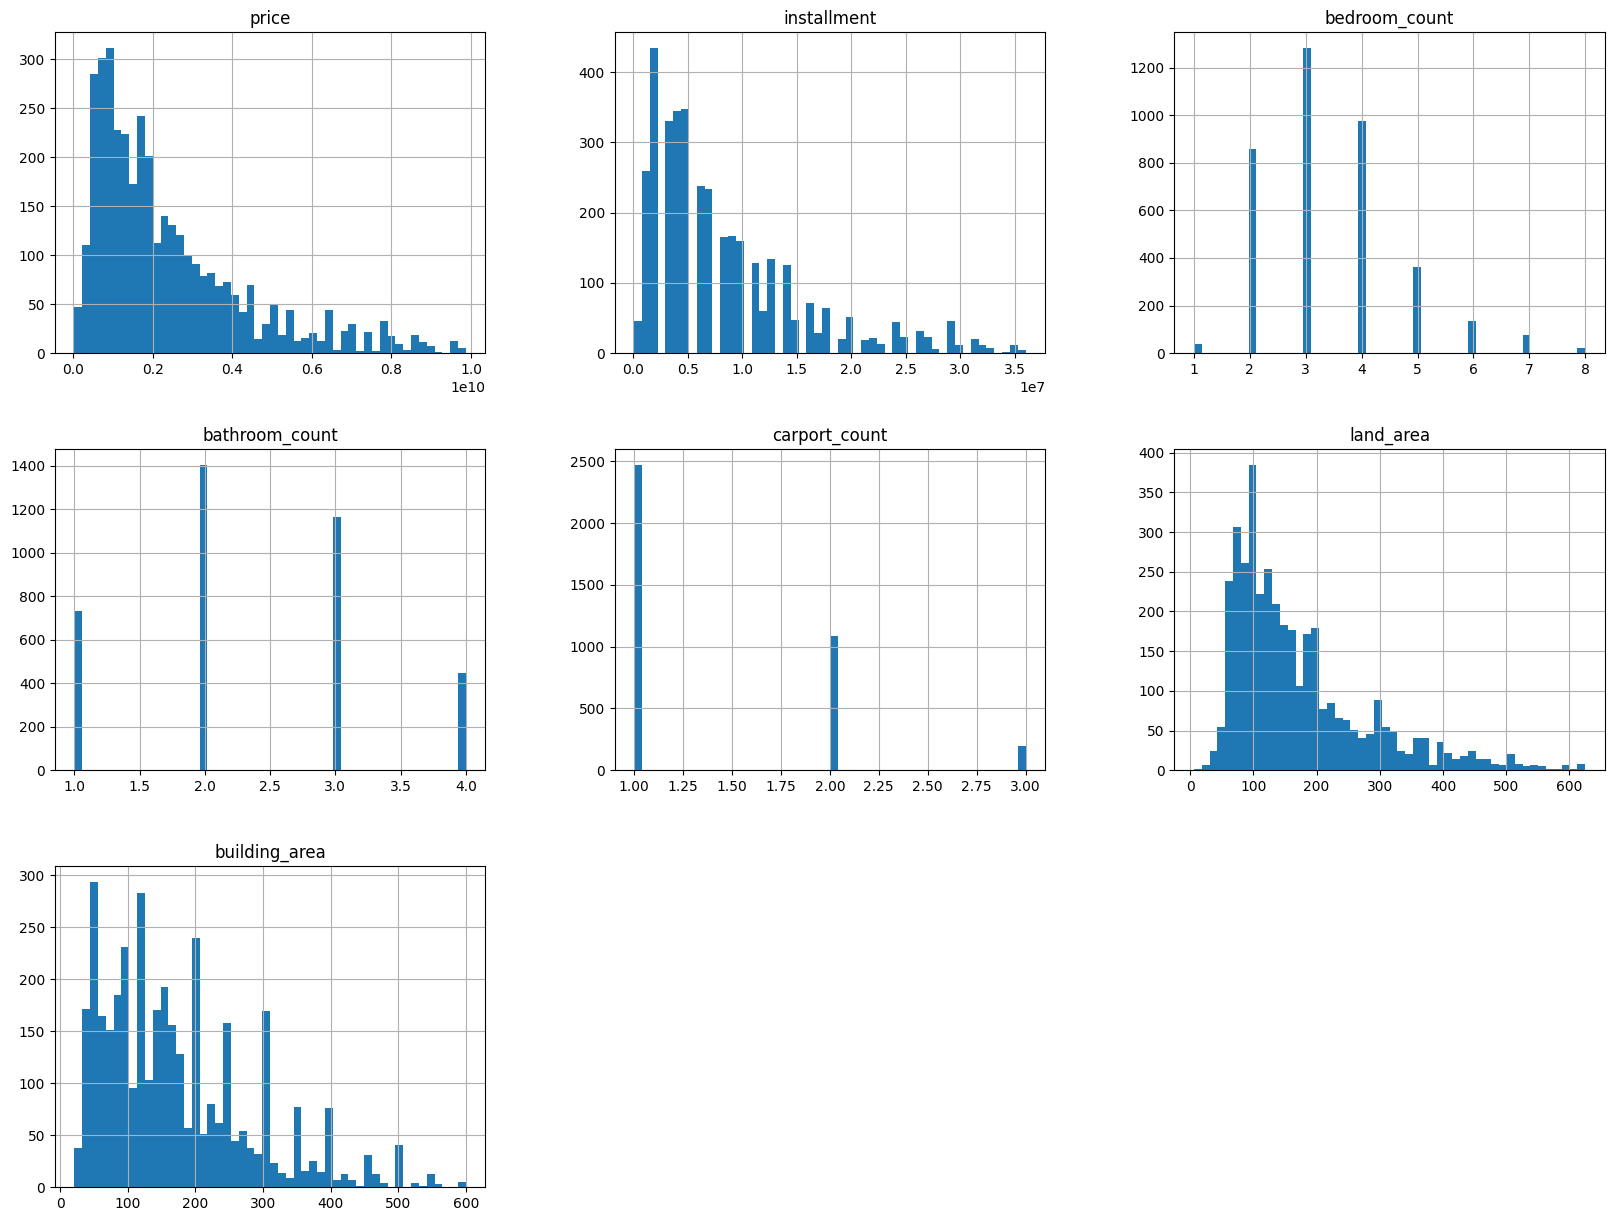

In [44]:
house.hist(bins=50, figsize=(20,15))
plt.show()

Mari amati histogram di atas, khususnya histogram untuk variabel `price` yang merupakan fitur target (label) pada data. Dari histogram `price`, kita bisa memperoleh beberapa informasi, antara lain:

- Distribusi harga miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model.
- Semakin tinggi harga rumah, semakin sedikit jumlah sampel yang tersedia. Tren ini menunjukkan bahwa rumah dengan harga terjangkau lebih umum dibandingkan rumah mewah.
- Rentang harga rumah cukup lebar, mencakup properti dari beberapa ratus juta hingga sekitar Rp 10 miliar.
- Berdasarkan konsentrasi sampel, dapat disimpulkan bahwa rumah dengan harga di bawah Rp 2 miliar mendominasi pasar.

### Multivariate Analysis

<ipython-input-45-f09f4ccef15f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=house, palette="Set3")


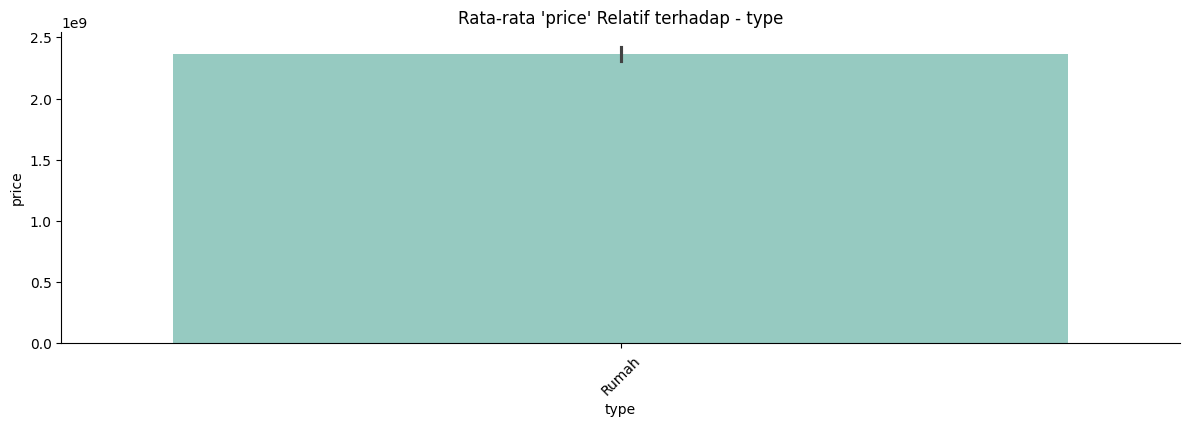

<ipython-input-45-f09f4ccef15f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=house, palette="Set3")


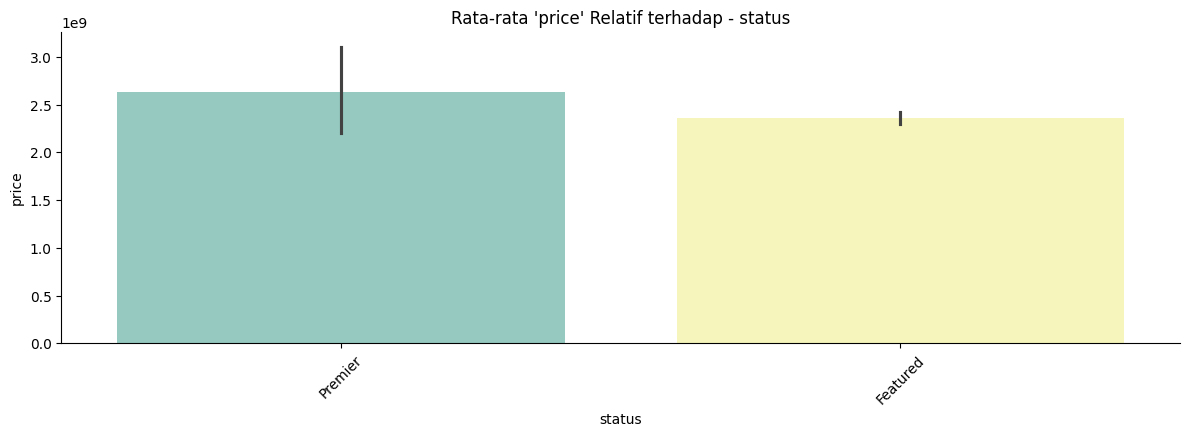

<ipython-input-45-f09f4ccef15f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=house, palette="Set3")
) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


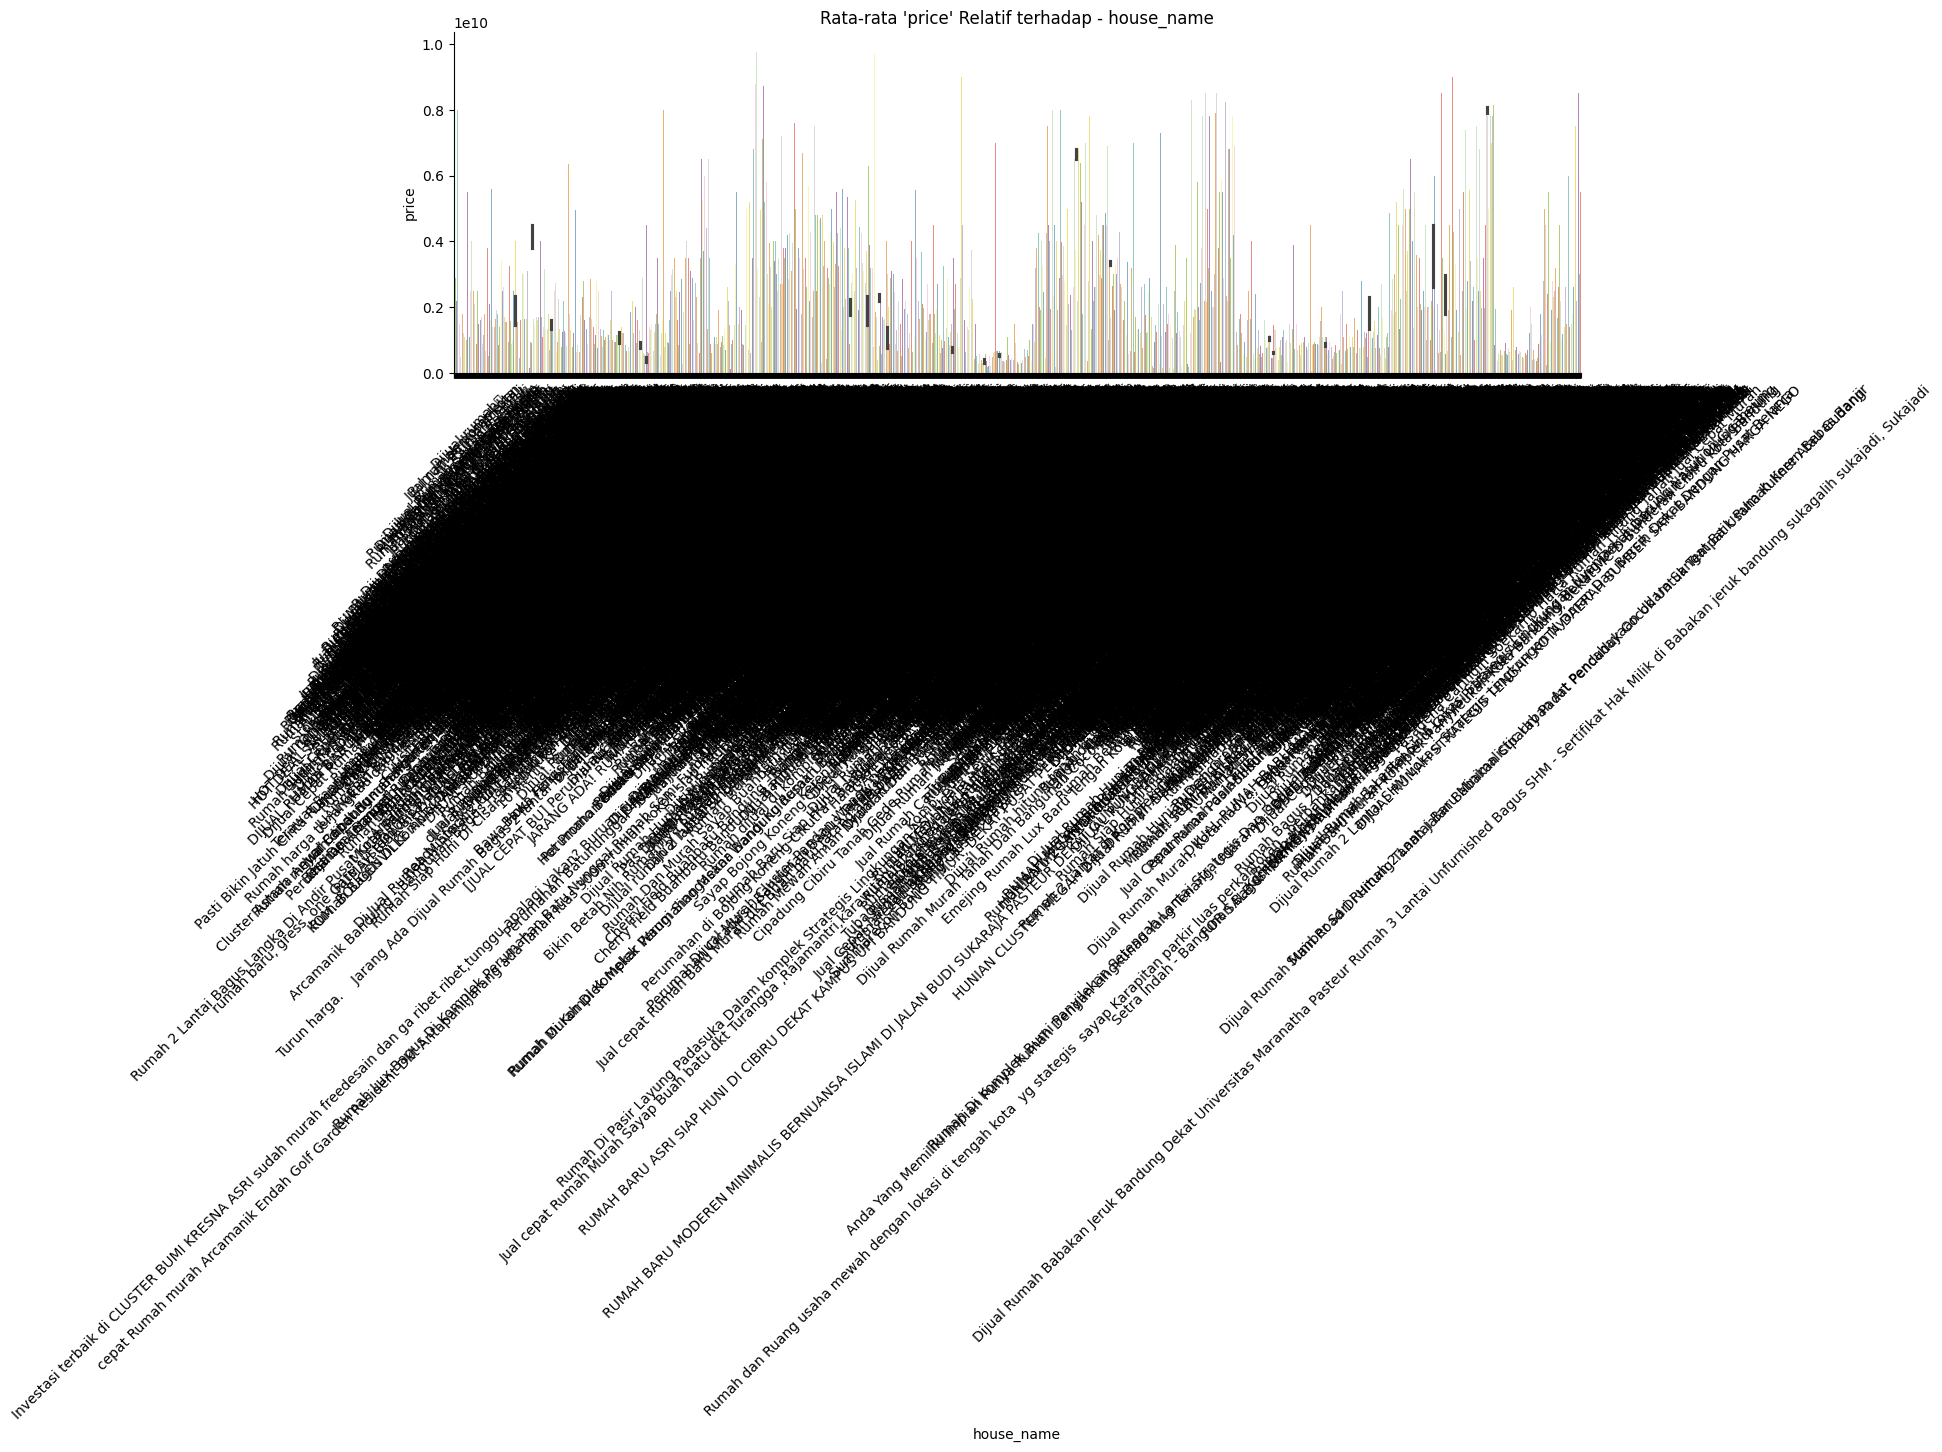

<ipython-input-45-f09f4ccef15f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=house, palette="Set3")


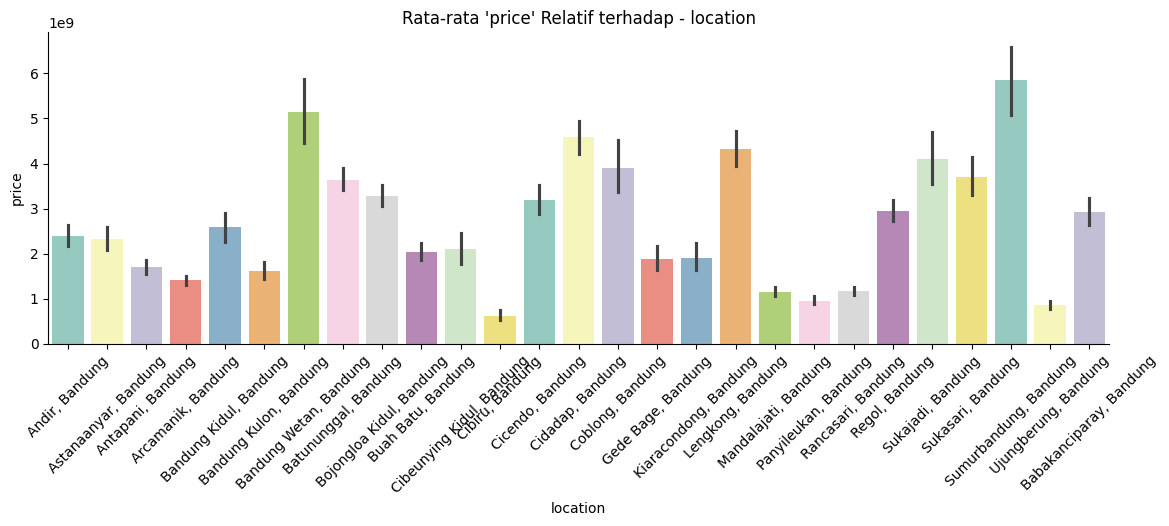

In [45]:
cat_features = house.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=house, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

  plt.xticks(rotation=45)
  plt.show()

Dengan mengamati rata-rata harga relatif terhadap fitur kategori di atas, dapat diperoleh insight sebagai berikut:

-  Karena fitur `type` hanya berisi satu nilai (Rumah), fitur ini tidak memiliki pengaruh signifikan terhadap variasi `price`. Dengan kata lain, tidak ada perbedaan rata-rata harga yang bisa dianalisis berdasarkan tipe properti. Sehingga, fitur tersebut dapat di-drop.
- Properti dengan `status` Premier memiliki rata-rata harga lebih tinggi dibandingkan dengan properti ber`status` Featured. `status` properti tampaknya memiliki dampak signifikan pada rata-rata `price`.
- Terdapat lebih dari 3.000 nama rumah yang unik. `house_name` tidak terlalu membantu untuk analisis agregat karena distribusinya sangat tersebar. Sehingga, fitur tersebut dapat di-drop.
- Distribusi antara kecamatan cukup merata. `location` merupakan fitur penting yang dapat mempengaruhi harga rumah. Properti di lokasi populer seperti kemungkinan memiliki harga lebih tinggi dibandingkan dengan lokasi yang kurang terwakili.


In [46]:
house.drop(['type', 'house_name'], inplace=True, axis=1)

<ipython-input-46-f0c908de3a6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house.drop(['type', 'house_name'], inplace=True, axis=1)


In [47]:
house.head()

,status,price,installment,location,bedroom_count,bathroom_count,carport_count,land_area,building_area
0,Premier,2100000000,7000000,"Andir, Bandung",3,2,2,137,170
1,Featured,4099999999,15000000,"Andir, Bandung",3,2,3,202,300
2,Featured,3300000000,12000000,"Andir, Bandung",5,2,1,350,258
3,Featured,580000000,2000000,"Andir, Bandung",2,2,1,30,80
5,Featured,3600000000,13000000,"Andir, Bandung",5,3,1,184,234


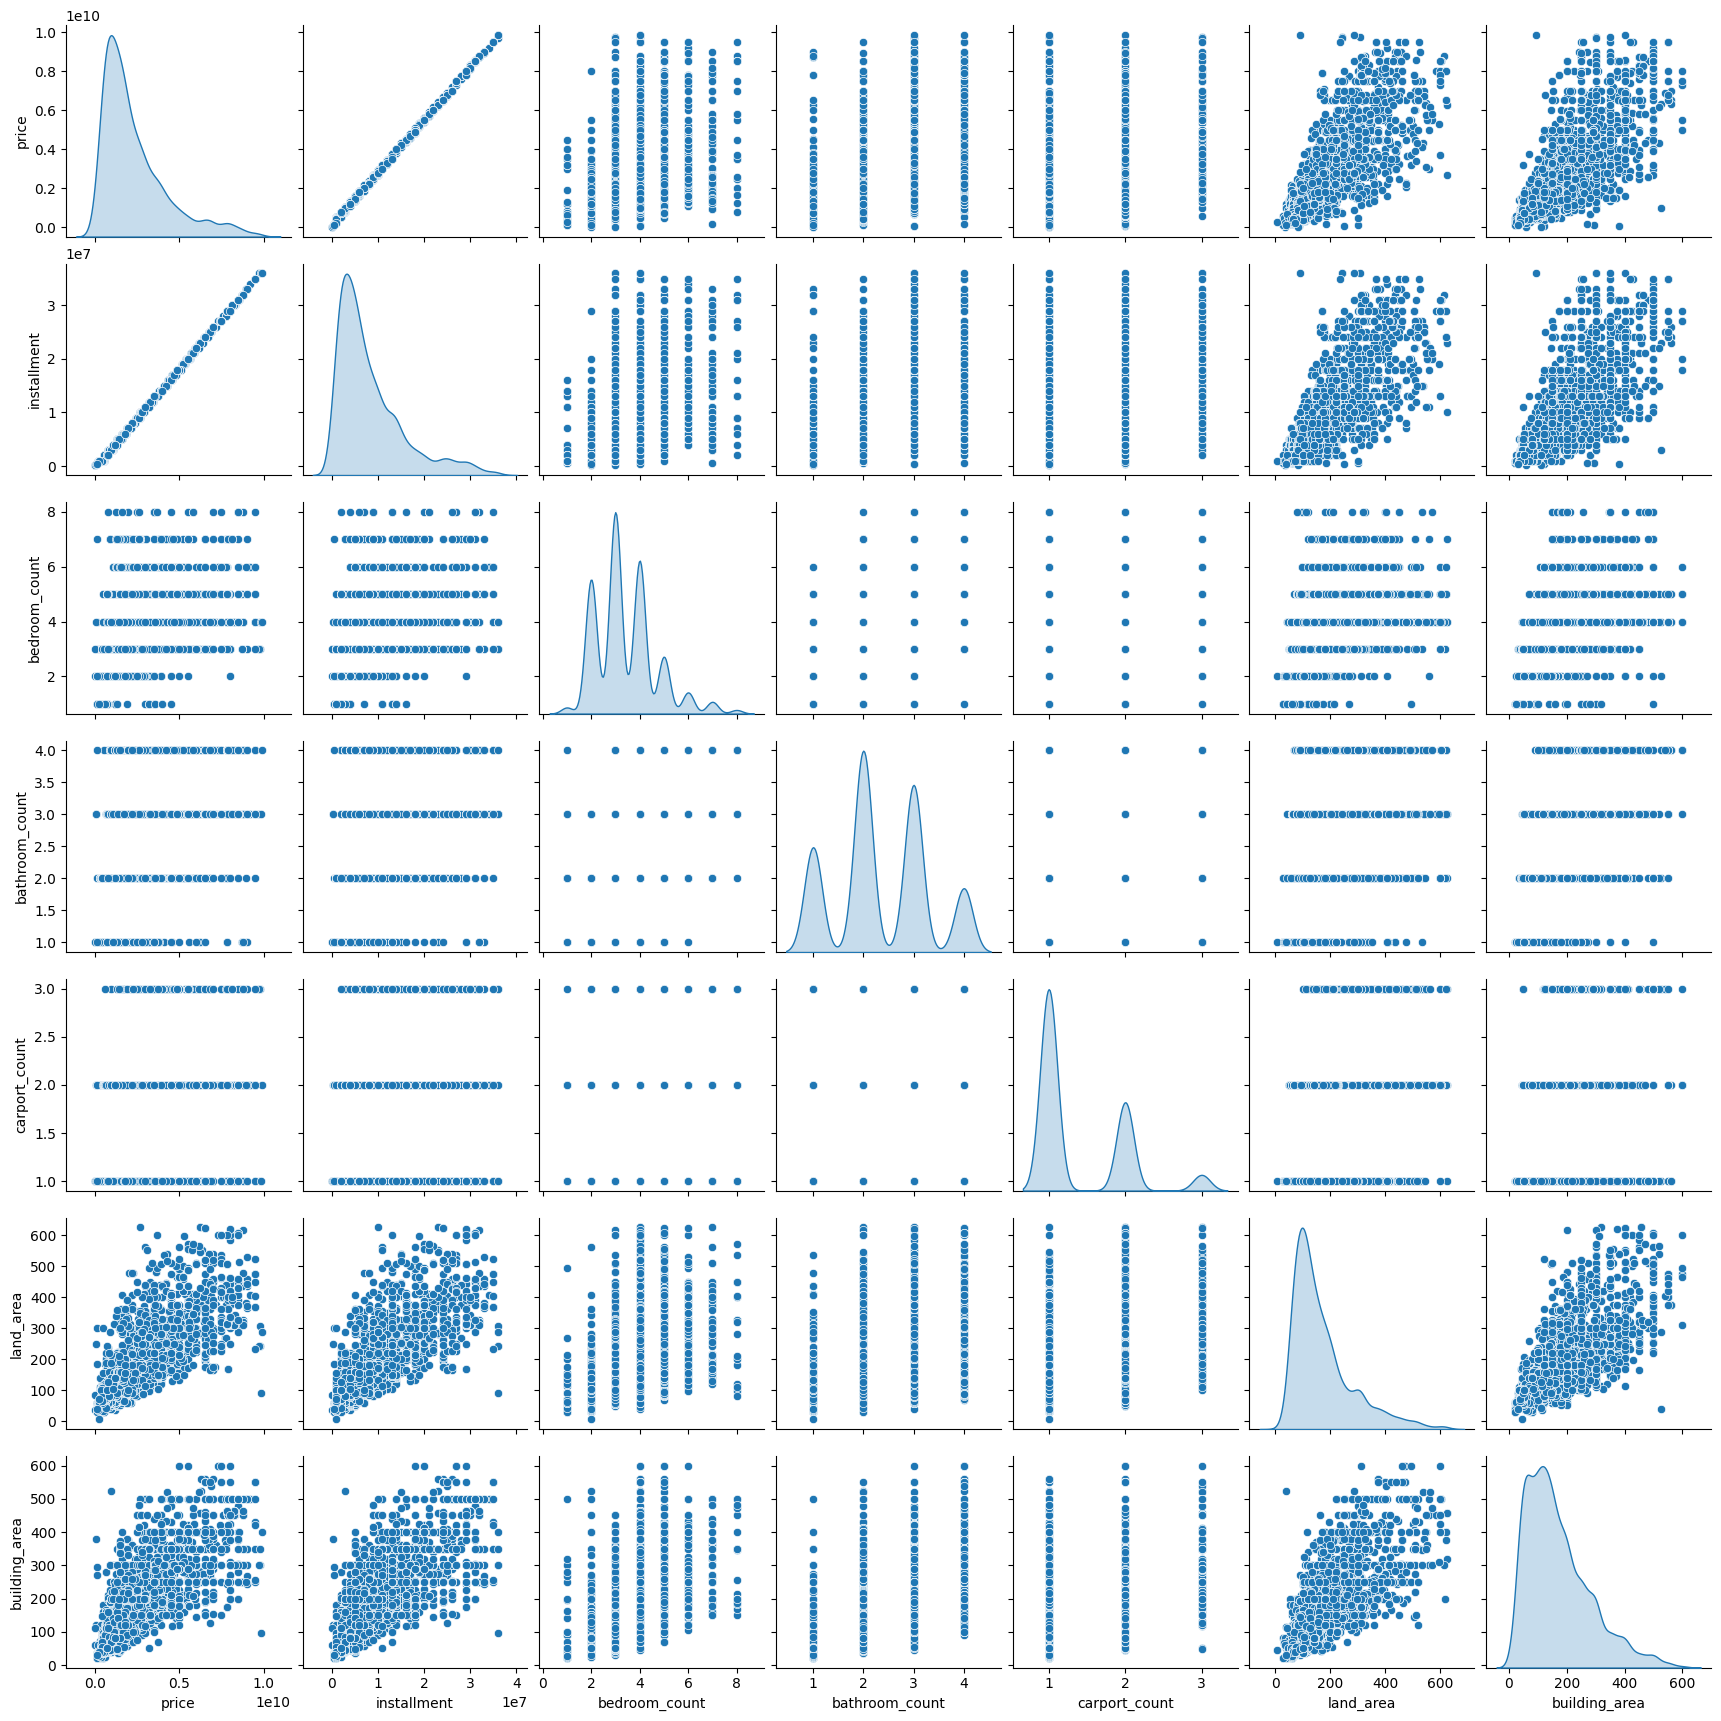

In [48]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(house, diag_kind = 'kde')

Pada pola sebaran data grafik pairplot, terlihat `installment`, `land_area`, dan `building_area` memiliki korelasi yang tinggi dengan fitur `price`. Sedangkan ketiga fitur lainnya yaitu `bedroom_count`, `bathroom_count`, dan `carport_count` terlihat memiliki korelasi yang lemah karena sebarannya tidak membentuk pola. Untuk mengevaluasi skor korelasinya, gunakan fungsi corr().

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

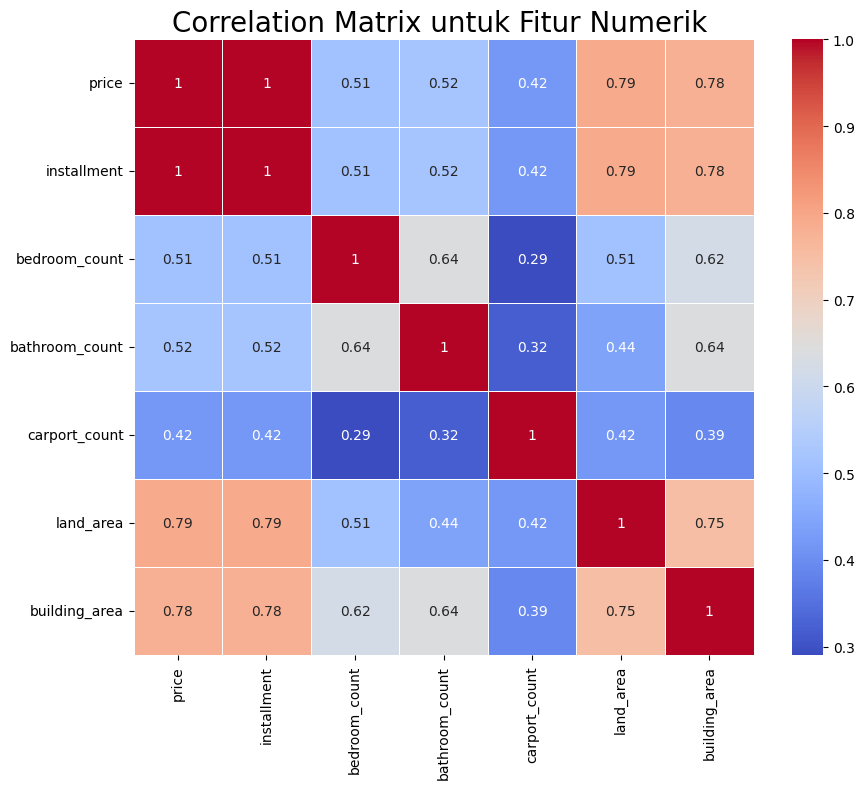

In [49]:
plt.figure(figsize=(10, 8))
correlation_matrix = house[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Fitur `installment` memiliki skor korelasi yang sangat tinggi (1), `land_area`, dan `building_area` memiliki skor korelasi yang besar (di atas 0.75) dengan fitur target `price`. Artinya, fitur `price` berkorelasi tinggi dengan ketiga fitur tersebut. Sementara itu, fitur `bedroom_count`, `bathroom_count` memiliki korelasi normal (0.5). Fitur `carport_count` (0.42) bisa didrop karena kurang berkolerasi.

In [50]:
house.drop(['carport_count'], inplace=True, axis=1)

<ipython-input-50-6008d7284447>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house.drop(['carport_count'], inplace=True, axis=1)


In [51]:
house

,status,price,installment,location,bedroom_count,bathroom_count,land_area,building_area
0,Premier,2100000000,7000000,"Andir, Bandung",3,2,137,170
1,Featured,4099999999,15000000,"Andir, Bandung",3,2,202,300
2,Featured,3300000000,12000000,"Andir, Bandung",5,2,350,258
3,Featured,580000000,2000000,"Andir, Bandung",2,2,30,80
5,Featured,3600000000,13000000,"Andir, Bandung",5,3,184,234
...,...,...,...,...,...,...,...,...
7601,Featured,3000000000,11000000,"Babakanciparay, Bandung",4,2,113,116
7603,Featured,1800000000,6000000,"Babakanciparay, Bandung",3,1,180,120
7604,Featured,800000000,2000000,"Babakanciparay, Bandung",3,2,128,111
7608,Featured,5500000000,20000000,"Babakanciparay, Bandung",6,3,375,290


Inilah data yang akan digunakan. Terdapat 3.751 sampel dari 8 kategori (fitur).

### One Hot Encoding

In [52]:
from sklearn.preprocessing import  OneHotEncoder
house = pd.concat([house, pd.get_dummies(house['status'], prefix='status')],axis=1)
house = pd.concat([house, pd.get_dummies(house['location'], prefix='location')],axis=1)
house.drop(['status','location'], axis=1, inplace=True)
house.head()

,price,installment,bedroom_count,bathroom_count,land_area,building_area,status_Featured,status_Premier,"location_Andir, Bandung","location_Antapani, Bandung",...,"location_Kiaracondong, Bandung","location_Lengkong, Bandung","location_Mandalajati, Bandung","location_Panyileukan, Bandung","location_Rancasari, Bandung","location_Regol, Bandung","location_Sukajadi, Bandung","location_Sukasari, Bandung","location_Sumurbandung, Bandung","location_Ujungberung, Bandung"
0,2100000000,7000000,3,2,137,170,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,4099999999,15000000,3,2,202,300,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3300000000,12000000,5,2,350,258,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,580000000,2000000,2,2,30,80,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,3600000000,13000000,5,3,184,234,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


### Train-Test-Split

In [53]:
from sklearn.model_selection import train_test_split

X = house.drop(["price"],axis =1)
y = house["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [54]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 3751
Total # of sample in train dataset: 3375
Total # of sample in test dataset: 376


### Normalisasi

In [55]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['installment', 'bedroom_count', 'bathroom_count', 'land_area', 'building_area']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,installment,bedroom_count,bathroom_count,land_area,building_area
2863,-0.053234,0.462358,0.692376,-0.479868,0.249557
6494,3.145531,3.701501,0.692376,2.557039,0.249557
153,0.642150,0.462358,0.692376,0.274757,1.152017
4983,1.754764,0.462358,-0.388461,1.590750,2.054476
6011,-0.748617,-1.157214,-1.469298,-0.691531,-1.104132


In [56]:
X_train[numerical_features].describe().round(4)

,installment,bedroom_count,bathroom_count,land_area,building_area
count,3375.0000,3375.0000,3375.0000,3375.0000,3375.0000
mean,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
std,1.0001,1.0001,1.0001,1.0001,1.0001
min,-1.1537,-1.9670,-1.4693,-1.5290,-1.3658
25%,-0.7486,-0.3474,-0.3885,-0.7007,-0.7431
50%,-0.3314,-0.3474,-0.3885,-0.2958,-0.2017
75%,0.3640,0.4624,0.6924,0.3668,0.6105
max,3.8409,3.7015,1.7732,4.1675,3.8594


Sekarang nilai mean = 0 dan standar deviasi = 1

# Modeling

### K-Nearest Neighbour

In [57]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### Random Forest

In [59]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

### AdaBoost

In [60]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluasi

In [61]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-61-69700ad92bf9>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.0593801  -1.02677095  0.08584294 -1.02677095  0.08584294 -0.33138727
 -1.02677095 -0.47046401 -0.60954074  1.33753357  2.17199399  2.86737768
 -1.02677095 -0.88769422 -0.33138727 -0.88769422 -0.47046401 -0.60954074
 -0.47046401  0.22491968 -0.74861748  1.75476378  0.22491968 -0.47046401
 -0.60954074 -0.74861748  3.14553115 -0.47046401 -0.88769422 -0.74861748
 -1.02677095 -0.05323379 -0.74861748 -0.60954074 -0.33138727 -0.88769422
 -0.74861748 -0.47046401 -0.05323379 -0.74861748  0.78122663 -0.47046401
 -0.47046401  2.31107073 -0.74861748 -0.33138727  0.36399642 -0.88769422
  0.92030336 -0.47046401  0.78122663 -0.74861748 -0.60954074 -0.19231053
  0.92030336 -0.88769422 -0.60954074 -1.02677095  0.22491968 -1.07280535
 -0.88769422  0.22491968 -1.02677095  2.17199399 -0.88769422  0.36399642
 -0.33138727  0.78122663 -0.60954074 -1.0267

In [62]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,137415595582089.296875,162132720572013.28125
RF,1068218863996.689453,4211373798934.224609
Boosting,48342645546709.953125,52303900344560.210938


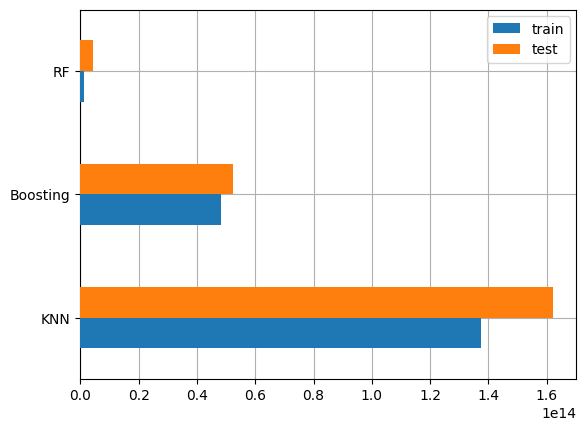

In [63]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Model Random Forest (RF) memberikan nilai eror yang paling kecil. Sedangkan model dengan algoritma KNN memiliki eror yang paling besar. Sehingga model Random Forest (RF) yang akan kita pilih sebagai model terbaik untuk melakukan prediksi harga rumah di Bandung.

In [64]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
6422,4500000000,4.195000e+09,4.501000e+09,4.254480e+09


Terlihat bahwa prediksi dengan Random Forest (RF) memberikan hasil yang paling mendekati.